In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score, roc_curve, roc_auc_score


import seaborn as sns
import matplotlib.pyplot as plt 


# For Machine LEarning Pipeline
from sklearn.pipeline import make_pipeline 

# For Standardising The Data
from sklearn.preprocessing import StandardScaler 

# Different Machine Learning Models    
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC # Support vector machine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier,RidgeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,HistGradientBoostingClassifier,BaggingClassifier
from sklearn.ensemble import  AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score



from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [3]:
parkn_data = pd.read_csv('parkinsons.csv')
parkn_data

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [5]:
parkn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [7]:
parkn_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [9]:
X = parkn_data.drop(columns=['status','name'],axis=1)
Y = parkn_data['status']


In [11]:
test_sizes = [0.1, 0.2, 0.3, 0.4, 0.5]

# Voting

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
from sklearn.ensemble import VotingClassifier
clf1 = AdaBoostClassifier()
clf2 = SGDClassifier()
clf3 = XGBClassifier()
clf4 = RandomForestClassifier()
clf5 = ExtraTreesClassifier()
clf6 = CatBoostClassifier(logging_level='Silent')
clf7 = KNeighborsClassifier()
clf8 = LogisticRegression()
clf9=  RidgeClassifier()
clf10= HistGradientBoostingClassifier()
clf11= BaggingClassifier()
clf12= GradientBoostingClassifier()
clf13= GaussianNB()
clf15= DummyClassifier()
clf16= SVC()

eclf = VotingClassifier(estimators=[('ADA', clf1), ('SGD', clf2), ('XGB', clf3), ('RF', clf4), ('ET', clf5), ('CAT', clf6), ('KN', clf7),
                                   ('LG', clf8), ('RC', clf9), ('HBC', clf10), ('BC', clf11), ('GBC', clf12), ('GNB', clf13)
                                    ,('DC', clf15),('SVC', clf16)],voting='hard')


In [18]:
results = []

In [20]:
for test_size in test_sizes:
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=42)
    print()
    print()
    print("For test size :", test_size)
    for clf, label in zip([clf1,clf2,clf3,clf4,clf5,clf6,clf7,clf8,clf9,clf10,clf11,clf12,clf13,clf15,clf16], 
                          ['ADA', 'SGD','XGB','RF','ET','CAT','KN','LG','RC','HBC','BC','GBC','GNB','DC','SVC']):
        scores = cross_val_score(clf, X_train, Y_train, scoring='accuracy', cv=5)
        print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))
        mean_accuracy = scores.mean()
        std_accuracy = scores.std()

        results.append({
            'Test Size': test_size,
            'Classifier': label,
            'Mean Accuracy': mean_accuracy,
            'Std Deviation': std_accuracy
        })



For test size : 0.1
Accuracy: 0.90 (+/- 0.05) [ADA]
Accuracy: 0.55 (+/- 0.22) [SGD]
Accuracy: 0.91 (+/- 0.06) [XGB]
Accuracy: 0.91 (+/- 0.05) [RF]
Accuracy: 0.93 (+/- 0.05) [ET]
Accuracy: 0.93 (+/- 0.02) [CAT]
Accuracy: 0.85 (+/- 0.03) [KN]
Accuracy: 0.84 (+/- 0.06) [LG]
Accuracy: 0.85 (+/- 0.07) [RC]
Accuracy: 0.91 (+/- 0.02) [HBC]
Accuracy: 0.88 (+/- 0.05) [BC]
Accuracy: 0.91 (+/- 0.03) [GBC]
Accuracy: 0.70 (+/- 0.04) [GNB]
Accuracy: 0.74 (+/- 0.01) [DC]
Accuracy: 0.82 (+/- 0.04) [SVC]


For test size : 0.2
Accuracy: 0.87 (+/- 0.04) [ADA]
Accuracy: 0.60 (+/- 0.19) [SGD]
Accuracy: 0.90 (+/- 0.02) [XGB]
Accuracy: 0.91 (+/- 0.04) [RF]
Accuracy: 0.92 (+/- 0.06) [ET]
Accuracy: 0.94 (+/- 0.05) [CAT]
Accuracy: 0.85 (+/- 0.07) [KN]
Accuracy: 0.83 (+/- 0.07) [LG]
Accuracy: 0.85 (+/- 0.06) [RC]
Accuracy: 0.90 (+/- 0.04) [HBC]
Accuracy: 0.87 (+/- 0.05) [BC]
Accuracy: 0.90 (+/- 0.05) [GBC]
Accuracy: 0.70 (+/- 0.05) [GNB]
Accuracy: 0.74 (+/- 0.01) [DC]
Accuracy: 0.79 (+/- 0.07) [SVC]


For test

In [21]:
df_results = pd.DataFrame(results)


In [22]:
df_results

,Test Size,Classifier,Mean Accuracy,Std Deviation
0,0.1,ADA,0.897143,0.049816
1,0.1,SGD,0.554286,0.220278
2,0.1,XGB,0.914286,0.059932
3,0.1,RF,0.908571,0.049156
4,0.1,ET,0.925714,0.052992
...,...,...,...,...
70,0.5,BC,0.844737,0.058702
71,0.5,GBC,0.886842,0.038099
72,0.5,GNB,0.660526,0.046898
73,0.5,DC,0.742105,0.006446


In [23]:

# Export DataFrame to an Excel file
df_results.to_excel("classifier_results.xlsx", index=False)

# Stacking

In [25]:
from sklearn.base import BaseEstimator, TransformerMixin, ClassifierMixin, clone
from sklearn.model_selection import KFold

In [26]:
class StackingAveragedModels(BaseEstimator, ClassifierMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds

    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)

        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred

        self.meta_model_.fit(out_of_fold_predictions, y)
        return self

    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

Best Test Size for Overall Results:

Test Size: 0.1 shows the best overall performance across models

CatBoost (CAT):(0.93 - 0.94)

ExtraTrees (ET): (0.91 - 0.93)

RandomForest (RF):0.89 - 0.91.

HBC (HistGradientBoostingClassifier) : 0.81 - 0.91 

GradientBoostingClassifier (GBC): 0.89 - 0.91.

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [39]:
stacked_averaged_models = StackingAveragedModels(base_models = (clf4,clf5,clf12,clf10),meta_model = clf6)

In [41]:
stacking_model=stacked_averaged_models.fit(X_train.values, Y_train.values)

stacking accuracy is: 90.000%


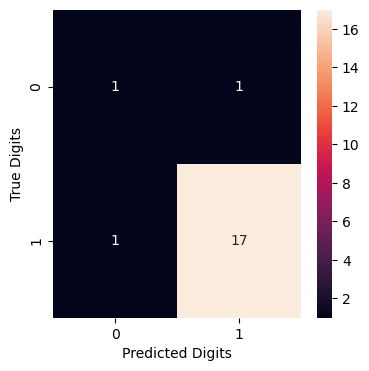

In [42]:
stacking_model.fit(X_train.values , Y_train.values)
y_pred_stacking = stacking_model.predict(X_test.values) 
stacking_acc = accuracy_score(Y_test.values, y_pred_stacking)
print("stacking accuracy is: {0:.3f}%".format(stacking_acc * 100))
cm = confusion_matrix(Y_test, y_pred_stacking)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted Digits")
plt.ylabel("True Digits")
plt.show()

In [44]:
# Save accuracy to Excel file
report_data = {'Model': ['Stacking Model'], 'Accuracy': [stacking_acc]}
df_report = pd.DataFrame(report_data)
df_report.to_excel("stacking_report.xlsx", index=False)


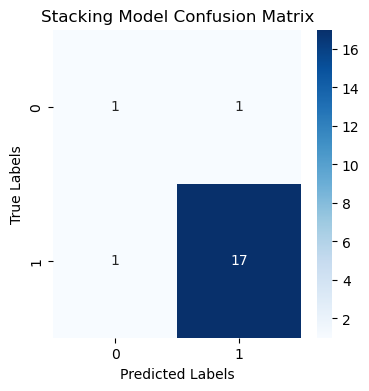

In [45]:
# Save heatmap as an image
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='.0f', cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Stacking Model Confusion Matrix")
plt.savefig("stacking_heatmap.png")